Consigne 2 :
- Importer la donner avec pd.read_csv ;
- Explorer la donnée avec un .head, .info() et .describe() par exemple;
- Nettoyer la donnée;
 - Récupérer uniquement les colonnes : ['Nb Quotidien Admis Hospitalisation','Nb Quotidien Admis Réanimation','Nb Quotidien Décès', 'Sexe'] ;
 - Visualiser la donnée avec seaborn avec un .pairplot() et un .heatmap() par exemple.
- Faites un regression lineaire  avec statsmodels.formula.api  pour expliquer le nombre de décès par le nombre d’hospitalisation (voir la documentation : https://www.statsmodels.org/stable/examples/notebooks/generated/formulas.html)
- Regardez le rsquared  et formulez une phrase en français avec cette indicateur pour une bonne interpretation.
- Que pouvez-vous conclure ? Si il y a 2500 hospitalisations combien prédisez-vous de décès ? (voir cette documentation : https://www.statsmodels.org/stable/examples/notebooks/generated/predict.html )
data

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

file = pd.read_csv('hospitals.csv', sep=';')
file.head(2)

,Code du Département,Date,Nb actuellement hospitalisés,Nb actuellement en soins intensifs,Total retour à domicile,Total Décès,Code région,Code ISO 3166 de la zone,Nom région,Nom département,Sexe,geo_point_2d,Nb Quotidien Admis Hospitalisation,Nb Quotidien Admis Réanimation,Nb Quotidien Décès,Nb Quotidien Retour à Domicile
0,2A,2020-08-30,2,0,84,21,94,FRA,Corse,Corse-du-Sud,Femme,"41.8725745076,8.98230498246",NaN,NaN,NaN,NaN
1,31,2020-08-30,21,3,313,31,76,FRA,Occitanie,Haute-Garonne,Femme,"43.3618361296,1.1827434953",NaN,NaN,NaN,NaN


In [2]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73023 entries, 0 to 73022
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Code du Département                 73023 non-null  object 
 1   Date                                73023 non-null  object 
 2   Nb actuellement hospitalisés        73023 non-null  int64  
 3   Nb actuellement en soins intensifs  73023 non-null  int64  
 4   Total retour à domicile             73023 non-null  int64  
 5   Total Décès                         73023 non-null  int64  
 6   Code région                         73023 non-null  int64  
 7   Code ISO 3166 de la zone            73023 non-null  object 
 8   Nom région                          73023 non-null  object 
 9   Nom département                     73023 non-null  object 
 10  Sexe                                73023 non-null  object 
 11  geo_point_2d                        73023

In [3]:
file.describe()

,Nb actuellement hospitalisés,Nb actuellement en soins intensifs,Total retour à domicile,Total Décès,Code région,Nb Quotidien Admis Hospitalisation,Nb Quotidien Admis Réanimation,Nb Quotidien Décès,Nb Quotidien Retour à Domicile
count,73023.000000,73023.000000,73023.000000,73023.000000,73023.000000,24240.000000,24240.000000,24240.000000,24240.000000
mean,88.858853,13.071950,482.271175,121.518631,52.653465,8.728919,1.398185,1.266254,5.890594
std,189.710183,35.680908,819.175020,230.480830,28.195564,22.121110,4.137807,3.698693,13.416755
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,70.000000,14.000000,27.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,3.000000,183.000000,42.000000,52.000000,1.000000,0.000000,0.000000,1.000000
75%,82.000000,10.000000,487.000000,112.000000,76.000000,7.000000,1.000000,1.000000,5.000000
max,3281.000000,855.000000,9114.000000,9178.000000,94.000000,404.000000,96.000000,76.000000,222.000000


In [4]:
file.dropna(inplace = True)
file.head(2)

,Code du Département,Date,Nb actuellement hospitalisés,Nb actuellement en soins intensifs,Total retour à domicile,Total Décès,Code région,Code ISO 3166 de la zone,Nom région,Nom département,Sexe,geo_point_2d,Nb Quotidien Admis Hospitalisation,Nb Quotidien Admis Réanimation,Nb Quotidien Décès,Nb Quotidien Retour à Domicile
4,72,2020-08-30,27,0,433,88,52,FRA,Pays de la Loire,Sarthe,Tous,"47.9939387561,0.227666178967",0.0,0.0,0.0,0.0
8,976,2020-08-30,6,0,442,28,6,MYT,Mayotte,Mayotte,Tous,"-12.8206134401,45.1474418557",0.0,0.0,0.0,0.0


In [5]:
file.shape

(24240, 16)

In [6]:
data = file[['Nb Quotidien Admis Hospitalisation','Nb Quotidien Admis Réanimation','Nb Quotidien Décès','Sexe']]

In [7]:
data

,Nb Quotidien Admis Hospitalisation,Nb Quotidien Admis Réanimation,Nb Quotidien Décès,Sexe
4,0.0,0.0,0.0,Tous
8,0.0,0.0,0.0,Tous
11,0.0,0.0,0.0,Tous
14,0.0,0.0,0.0,Tous
17,0.0,0.0,1.0,Tous
...,...,...,...,...
73009,1.0,1.0,0.0,Tous
73010,0.0,1.0,0.0,Tous
73013,6.0,2.0,0.0,Tous
73017,30.0,2.0,0.0,Tous


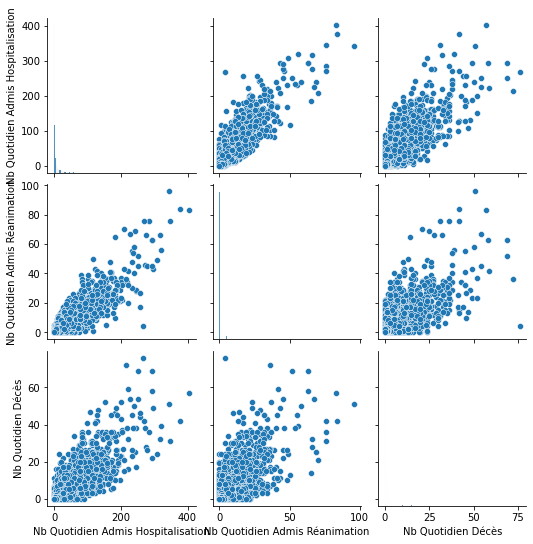

In [8]:
sns.pairplot(data)

In [9]:
data.corr()
#tableau de corrélation

,Nb Quotidien Admis Hospitalisation,Nb Quotidien Admis Réanimation,Nb Quotidien Décès
Nb Quotidien Admis Hospitalisation,1.000000,0.894560,0.835108
Nb Quotidien Admis Réanimation,0.894560,1.000000,0.742137
Nb Quotidien Décès,0.835108,0.742137,1.000000


<AxesSubplot:>

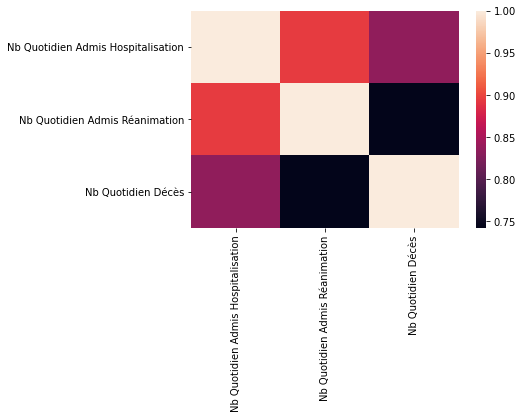

In [10]:
sns.heatmap(data.corr())

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
data.columns

Index(['Nb Quotidien Admis Hospitalisation', 'Nb Quotidien Admis Réanimation',
       'Nb Quotidien Décès', 'Sexe'],
      dtype='object')

In [17]:
data.columns = ['Hospitalisation', 'Réanimation',
       'Décès', 'Sexe']

In [18]:
data.columns

Index(['Hospitalisation', 'Réanimation', 'Décès', 'Sexe'], dtype='object')

In [28]:
#la construction du modèle : y = décès et x = hospitalisations

model = ols(formula = "Décès ~ Hospitalisation", data = data)

In [29]:
# l'entrainement du modèle

model_train = model.fit()

In [30]:
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Décès   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                 5.586e+04
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:54:07   Log-Likelihood:                -51612.
No. Observations:               24240   AIC:                         1.032e+05
Df Residuals:                   24238   BIC:                         1.032e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0474      0.014      3.375      0.001       0.020       0.075
Hospitalisation     0.1396      0.001    236.353      0.000       0.138       0.141
==============================================================================
Omnibus:                    20482.799   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2926063.453
Skew:                           3.410   Prob(JB):                         0.00
Kurtosis:                      56.391   Cond. No.                         25.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# R2 = 0,69 dit que 69 % de la variation des décès est expliquée par l'hospitalisation.

In [32]:
# l'intercept dit que s'il y a zéro hospitalisation, les décès augmentent de 0,047 

In [34]:
# 'hospitalisation' signifie que les décès augmentent de 1 lorsque les hospitalisations augmentent de 0,14

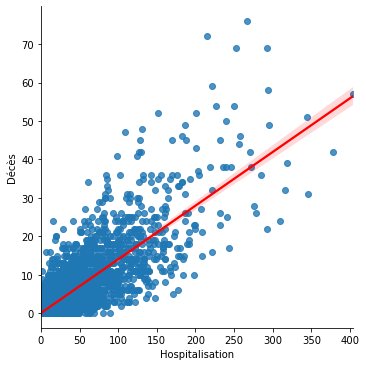

In [35]:
sns.lmplot(x = 'Hospitalisation', y = 'Décès', data = data, line_kws = {"color":"red"})

In [36]:
hospitalisation = {'Hospitalisation':[2500]}

In [37]:
h2 = pd.DataFrame(hospitalisation)

In [38]:
h2

,Hospitalisation
0,2500


In [39]:
y_pred = model_train.predict(h2[hospitalisation])

In [41]:
y_pred
# nombre de décès prédit pour 2500 hospitalisations = 349

0    349.126744
dtype: float64

In [43]:
# on prédit grâce au .predict() qui s'applique sur notre modèle d'entraînement 
# et on lui donne en paramètre la variable expliquative 
# et le résidu est = prédiction - décès

y_pred2 = model_train.predict(data['Hospitalisation'])
y_pred2


4        0.047420
8        0.047420
11       0.047420
14       0.047420
17       0.047420
           ...   
73009    0.187052
73010    0.047420
73013    0.885210
73017    4.236372
73021    0.047420
Length: 24240, dtype: float64

In [44]:
residu = y_pred2 - data['Décès']
residu

4        0.047420
8        0.047420
11       0.047420
14       0.047420
17      -0.952580
           ...   
73009    0.187052
73010    0.047420
73013    0.885210
73017    4.236372
73021    0.047420
Length: 24240, dtype: float64

<AxesSubplot:>

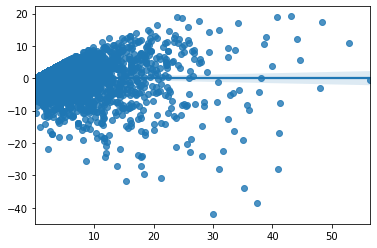

In [45]:
sns.regplot(x = y_pred2, y = residu)

/Users/sandrinevuachet/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sandrinevuachet/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

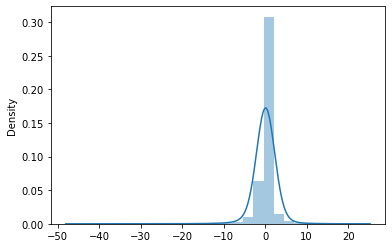

In [53]:
sns.distplot(residu, bins=25, kde_kws = {"bw":1})

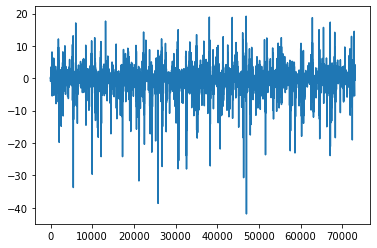

In [54]:
plt.plot(residu)

<AxesSubplot:xlabel='Décès', ylabel='Hospitalisation'>

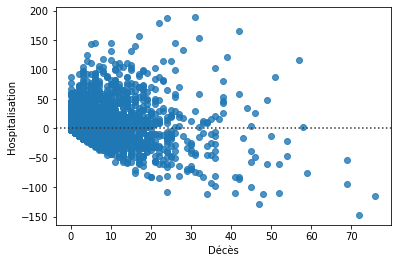

In [55]:
sns.residplot(x = 'Décès', y = 'Hospitalisation', data =data)